In [86]:
#Install required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import random
import datetime 

In [87]:
#Import dataset
data = pd.read_csv("D:/UTD Fall 2020/ML/Assignment1/SeoulBikeData.csv", encoding= 'unicode_escape')
#Dimension of dataset
data.shape


(8760, 14)

In [88]:
#Viewing data
data.head()


,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [89]:
#structure of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [90]:
data["Date"]=pd.to_datetime(data["Date"],dayfirst=True)
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [91]:
#feature engineering
#extracting month and day of week from date
data["Month"]=data["Date"].dt.month
data["Weekday"]=data["Date"].dt.weekday


In [92]:
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month,Weekday
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,4
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,4
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,4
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,4
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,4


In [93]:
data.isnull().sum() 

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
Month                        0
Weekday                      0
dtype: int64

In [94]:
#Discriptive statistics
data.describe().T


,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


Text(0.5, 1, 'Variable Correlation')

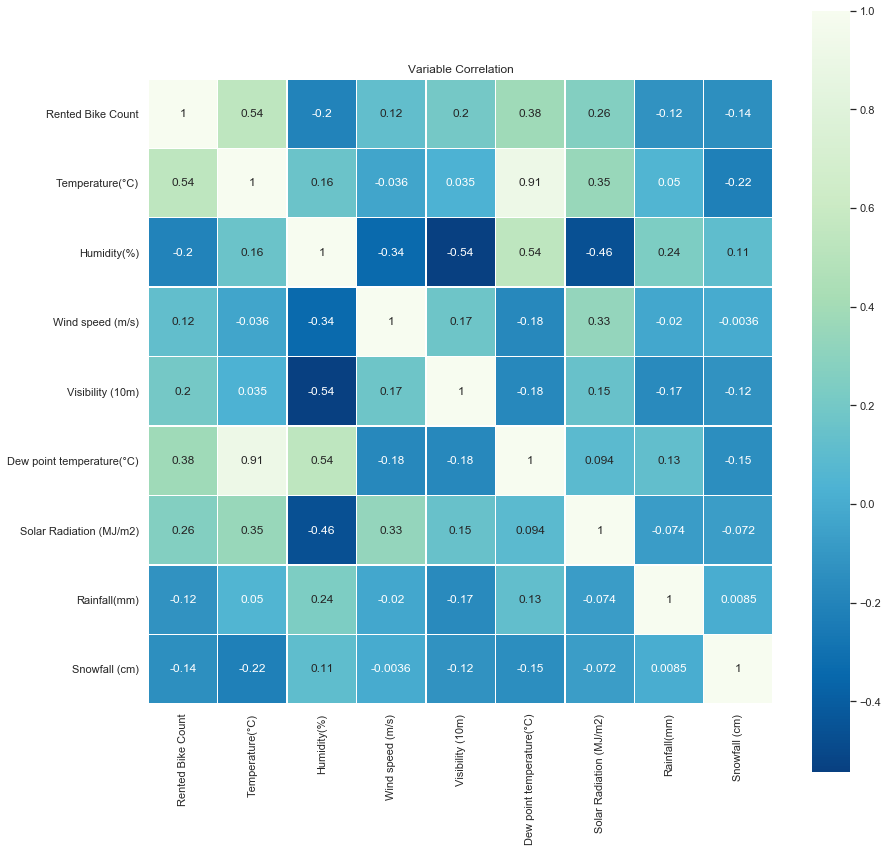

In [95]:
data_num=data.select_dtypes(include=['float64','int64'])
data_num=data_num.drop(columns=["Month","Weekday","Hour"],axis=1)
plt.figure(figsize=(14,14))
sns.set(font_scale=1)
sns.heatmap(data_num.corr(),cmap='GnBu_r',annot=True, square = True ,linewidths=.5);
plt.title('Variable Correlation')

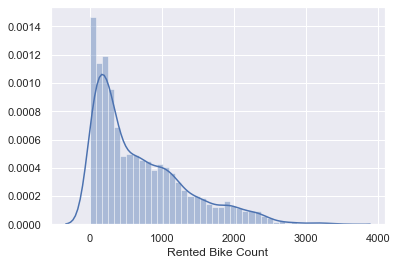

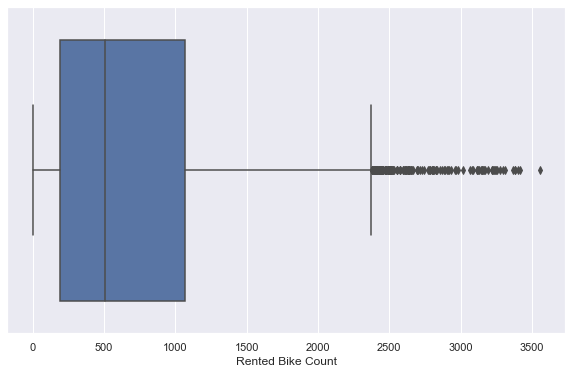

In [96]:
sns.distplot(data['Rented Bike Count'])

#checking for outliers
plt.figure(figsize=(10,6))
sns.boxplot(data['Rented Bike Count'])


In [97]:
#removing outliers
Q1=data['Rented Bike Count'].quantile(0.25)
Q2=data['Rented Bike Count'].quantile(0.75)
IQR = Q2 - Q1
UL=Q2+1.5*IQR
data= data[(data['Rented Bike Count']<UL)]
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8602.0,667.971635,589.552620,0.0,188.0,485.00,1030.75,2375.00
Hour,8602.0,11.377122,6.920938,0.0,5.0,11.00,17.00,23.00
Temperature(°C),8602.0,12.674890,11.937911,-17.8,3.2,13.30,22.20,39.40
Humidity(%),8602.0,58.372937,20.455133,0.0,42.0,57.00,74.00,98.00
Wind speed (m/s),8602.0,1.716124,1.038349,0.0,0.9,1.50,2.30,7.40
Visibility (10m),8602.0,1431.978958,610.175009,27.0,929.0,1689.50,2000.00,2000.00
Dew point temperature(°C),8602.0,3.916624,13.102464,-30.6,-4.9,4.80,14.70,27.20
Solar Radiation (MJ/m2),8602.0,0.568715,0.874273,0.0,0.0,0.01,0.93,3.52
Rainfall(mm),8602.0,0.151407,1.138328,0.0,0.0,0.00,0.00,35.00
Snowfall (cm),8602.0,0.076447,0.440620,0.0,0.0,0.00,0.00,8.80


In [98]:
data.shape

(8602, 16)

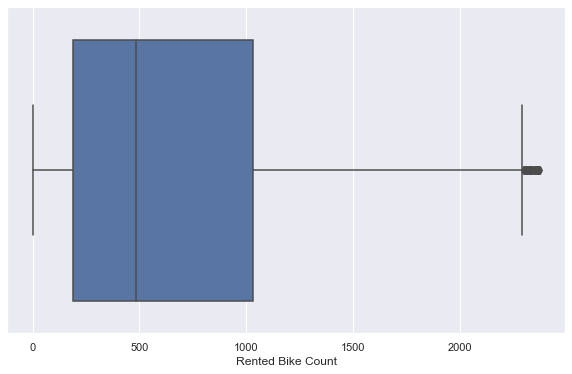

In [99]:
plt.figure(figsize=(10,6))
sns.boxplot(data['Rented Bike Count'])


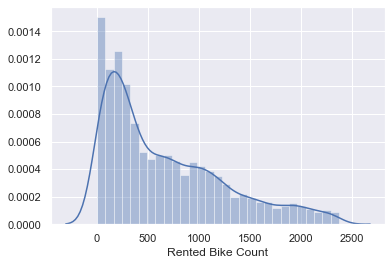

In [100]:
sns.distplot(data['Rented Bike Count'])


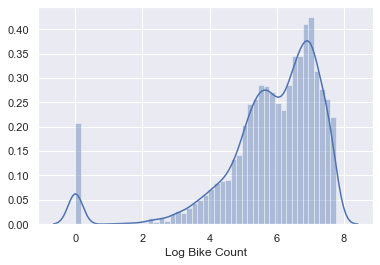

In [101]:
data['Log Bike Count']=np.log(data['Rented Bike Count']+1)
sns.distplot(data['Log Bike Count'])

In [102]:
data.insert(0,'intercept',1)
data.head()

,intercept,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month,Weekday,Log Bike Count
0,1,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,4,5.541264
1,1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,4,5.323010
2,1,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,4,5.159055
3,1,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,4,4.682131
4,1,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,4,4.369448


In [103]:
#Create dummy variables
dummies_season = pd.get_dummies(data['Seasons'],prefix="Season",drop_first=True)
dummies_holiday = pd.get_dummies(data['Holiday'],prefix="Holiday",drop_first=True)
dummies_FD = pd.get_dummies(data['Functioning Day'],prefix="Functioning",drop_first=True)
dummies_month = pd.get_dummies(data['Month'],prefix="Month",drop_first=True)
dummies_wd = pd.get_dummies(data['Weekday'],prefix="Weekday",drop_first=True)
data = pd.concat([data,dummies_season,dummies_holiday,dummies_FD,dummies_month,dummies_wd], axis=1)      


In [104]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8602 entries, 0 to 8759
Data columns (total 40 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   intercept                  8602 non-null   int64         
 1   Date                       8602 non-null   datetime64[ns]
 2   Rented Bike Count          8602 non-null   int64         
 3   Hour                       8602 non-null   int64         
 4   Temperature(°C)            8602 non-null   float64       
 5   Humidity(%)                8602 non-null   int64         
 6   Wind speed (m/s)           8602 non-null   float64       
 7   Visibility (10m)           8602 non-null   int64         
 8   Dew point temperature(°C)  8602 non-null   float64       
 9   Solar Radiation (MJ/m2)    8602 non-null   float64       
 10  Rainfall(mm)               8602 non-null   float64       
 11  Snowfall (cm)              8602 non-null   float64       
 12  Season

In [105]:
df=data.drop(columns =['Date','Seasons','Holiday','Functioning Day','Month','Weekday'], axis = 1)


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8602 entries, 0 to 8759
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   intercept                  8602 non-null   int64  
 1   Rented Bike Count          8602 non-null   int64  
 2   Hour                       8602 non-null   int64  
 3   Temperature(°C)            8602 non-null   float64
 4   Humidity(%)                8602 non-null   int64  
 5   Wind speed (m/s)           8602 non-null   float64
 6   Visibility (10m)           8602 non-null   int64  
 7   Dew point temperature(°C)  8602 non-null   float64
 8   Solar Radiation (MJ/m2)    8602 non-null   float64
 9   Rainfall(mm)               8602 non-null   float64
 10  Snowfall (cm)              8602 non-null   float64
 11  Log Bike Count             8602 non-null   float64
 12  Season_Spring              8602 non-null   uint8  
 13  Season_Summer              8602 non-null   uint8

In [107]:
#feature scaling
sc=StandardScaler()
df.iloc[:,2:10]=sc.fit_transform(df.iloc[:,2:10])

In [108]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
intercept,8602.0,1.000000e+00,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Rented Bike Count,8602.0,6.679716e+02,589.552620,0.000000,188.000000,485.000000,1030.750000,2375.000000
Hour,8602.0,-4.839963e-17,1.000058,-1.643965,-0.921478,-0.054493,0.812492,1.679477
Temperature(°C),8602.0,-1.806791e-16,1.000058,-2.552931,-0.793727,0.052367,0.797934,2.238806
Humidity(%),8602.0,-4.093964e-17,1.000058,-2.853872,-0.800478,-0.067123,0.764012,1.937380
Wind speed (m/s),8602.0,-7.510978e-17,1.000058,-1.652839,-0.786028,-0.208154,0.562344,5.474272
Visibility (10m),8602.0,-1.196168e-15,1.000058,-2.302717,-0.824367,0.422069,0.930969,0.930969
Dew point temperature(°C),8602.0,-1.650002e-15,1.000058,-2.634514,-0.672937,0.067425,0.823051,1.777126
Solar Radiation (MJ/m2),8602.0,-3.931212e-15,1.000058,-0.650539,-0.650539,-0.639100,0.413264,3.375898
Rainfall(mm),8602.0,1.775066e-15,1.000058,-0.133016,-0.133016,-0.133016,-0.133016,30.615631


In [109]:
#splitting data into test and train data
target=df[['Log Bike Count']].values
df_predictors=df.drop(columns=['Rented Bike Count','Log Bike Count'],axis=1).values
x_train, x_test, y_train, y_test = train_test_split(df_predictors, target, test_size = 0.2, random_state = 0)
mat_coef=np.zeros((1,len(x_train[0])),dtype=int)

### Linear Regression

In [110]:
#defining cost function
def linear_cost_func(x,actualval,mat_coef):
  residual=np.dot(x,mat_coef.T)-actualval
  cost_func=np.sum(np.power(residual,2)/(2*len(x)))
  return cost_func

In [111]:
#define gradient decent considering fixed iterations
def linear_gdesc(x,actualval,mat_coef,alpha,iterations,threshold):
  cost_funcls=[linear_cost_func(x,actualval,mat_coef)]
  gd_data=pd.DataFrame(mat_coef)
  for i in range(1,iterations):
    residual=np.dot(x,mat_coef.T)-actualval
    derivative=np.dot(residual.T,x)
    mat_coef=mat_coef-derivative*alpha/len(x)   
    gd_data=gd_data.append(pd.DataFrame(mat_coef),ignore_index=True)
    cost_funcls+=[linear_cost_func(x,actualval,mat_coef)]
    if (abs(cost_funcls[i]-cost_funcls[i-1]))<=threshold:
      break
  gd_data['cost function']=cost_funcls
  #print(gddf)
  print("Iterations needed to converge: ", i+1)
  min_cost_coef=gd_data[gd_data['cost function']==min(gd_data['cost function'])]
  print('Cost at convergance: ', cost_funcls[i])
  min_cost_coef=min_cost_coef.drop(columns='cost function',axis=1)
  #print(min_cost)
  return min_cost_coef


In [112]:
#predicting target variable
def predict(coef_ls,x_mat):
  pred=x_mat.dot(coef_ls.T)
  return pred

In [113]:
#RMSE
def reg_rmse(ypredict,yactual):
  sum_sqerror=np.sum((yactual-ypredict)**2)
  mse=sum_sqerror/len(yactual)
  rmse=(mse)**(1/2)
  return rmse

In [114]:
def LinearReg(x_train,x_test,y_train,y_test,alpha,iterations,mat_coef,threshold):
  if len(alpha)>1:
    coef_ls=[0]*len(alpha)
    ypredict=[0]*len(alpha)
    rmse=[0]*len(alpha)
    for i, a in enumerate(alpha, start=0):
      coef_ls[i]=linear_gdesc(x_train,y_train,mat_coef,a,iterations,threshold)
      ypredict[i]=predict(coef_ls[i],x_test)
      rmse[i]=reg_rmse(ypredict[i],y_test)
      print("For learning rate=", a, " RMSE is: ", rmse[i])
      print("Coeffients: ",coef_ls[i])
    plt.plot(alpha,rmse)
    plt.xlabel('Learning Rate')
    plt.ylabel('RMSE')
    plt.show()
  elif len(threshold)>1:
    coef_ls=[0]*len(threshold)
    ypredict=[0]*len(threshold)
    rmse=[0]*len(threshold)
    for i, t in enumerate(threshold, start=0):
      coef_ls[i]=linear_gdesc(x_train,y_train,mat_coef,alpha,iterations,t)
      ypredict[i]=predict(coef_ls[i],x_test)
      rmse[i]=reg_rmse(ypredict[i],y_test)
      print("For threshold=", t, " RMSE is: ", rmse[i])
      print("Coeffients: ",coef_ls[i])
    plt.plot(threshold,rmse)
    plt.xlabel('Threshold')
    plt.ylabel('RMSE')
    plt.show()
  else:
    coef_ls=[0]
    ypredict=[0]
    rmse=[0]
    for i in range(1):
      coef_ls[i]=linear_gdesc(x_train,y_train,mat_coef,alpha,iterations,threshold)
      ypredict[i]=predict(coef_ls[i],x_test)
      rmse[i]=reg_rmse(ypredict[i],y_test)
      print("For threshold=", threshold," and learning rate: ",alpha, " RMSE is: ", rmse[i])
      print("Coeffients: ",coef_ls[i])
    return rmse[i]

### Experiment 1-varying alpha values

Iterations needed to converge:  1000
Cost at convergance:  0.2614741449273105
For learning rate= 0.09  RMSE is:  0.6952388007302867
Coeffients:            0         1         2         3         4         5         6   \
999  0.33652  0.274275  0.215405 -0.492109 -0.020217  0.037676  0.428184   

           7         8         9   ...       22        23        24        25  \
999 -0.026131 -0.234143 -0.027713  ...  0.03676  0.338599  0.348873  0.204452   

           26        27        28        29        30        31  
999 -0.049939  0.031542  0.000233  0.053644 -0.038169 -0.245035  

[1 rows x 32 columns]
Iterations needed to converge:  1000
Cost at convergance:  0.26000043131031053
For learning rate= 0.095  RMSE is:  0.6920381872811803
Coeffients:             0        1         2         3         4         5         6   \
999  0.282985  0.27387  0.207484 -0.496142 -0.019752  0.038179  0.440346   

           7         8         9   ...        22        23       24        25  \
999

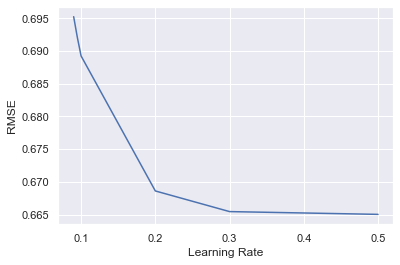

In [115]:
#Experimenting on test set
threshold=[0.000001]
alpha=[0.09,0.095,0.1,0.2,0.3,0.5]
iterations=1000
LinearReg(x_train,x_test,y_train,y_test,alpha,iterations,mat_coef,threshold)

Iterations needed to converge:  1000
Cost at convergance:  0.6807416523805272
For learning rate= 0.001  RMSE is:  1.1668261673278735
Coeffients:             0         1         2         3         4         5         6   \
999  1.719397  0.211391  0.248122 -0.193085 -0.006596  0.099965  0.140917   

           7         8         9   ...        22        23        24  \
999  0.124379 -0.165962  0.075463  ...  0.142489  0.168782  0.162731   

           25        26        27        28        29        30       31  
999  0.124979  0.228886  0.241712  0.236906  0.253496  0.247864  0.22609  

[1 rows x 32 columns]
Iterations needed to converge:  1000
Cost at convergance:  0.46902256946395265
For learning rate= 0.01  RMSE is:  0.9685273041726317
Coeffients:             0         1         2         3         4         5         6   \
999  1.640642  0.295461  0.343112 -0.407128 -0.056285  0.030194  0.193781   

           7         8         9   ...        22        23        24  \
999 -0.0

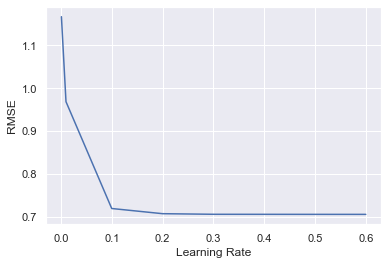

In [116]:
#Experimenting on train set
threshold=[0.000001]
alpha=[0.001,0.01,0.1,0.2,0.3,0.5,0.6]
iterations=1000
mat_coef=np.zeros((1,len(x_train[0])),dtype=int)
LinearReg(x_train,x_train,y_train,y_train,alpha,iterations,mat_coef,threshold)

### Experiment 2-varying threshold values

Iterations needed to converge:  1000
Cost at convergance:  0.2491181334088997
For threshold= 1e-08  RMSE is:  0.6654497582594884
Coeffients:             0         1         2         3         4         5         6   \
999 -0.514992  0.268894 -0.038011 -0.618831 -0.014127  0.042684  0.771181   

           7         8        9   ...        22        23        24        25  \
999 -0.019584 -0.229835 -0.02879  ... -0.094787  0.220981  0.233451  0.254821   

           26        27        28        29        30        31  
999  0.075154  0.124576  0.091984  0.148089  0.039362 -0.162119  

[1 rows x 32 columns]
Iterations needed to converge:  1000
Cost at convergance:  0.2491181334088997
For threshold= 1e-07  RMSE is:  0.6654497582594884
Coeffients:             0         1         2         3         4         5         6   \
999 -0.514992  0.268894 -0.038011 -0.618831 -0.014127  0.042684  0.771181   

           7         8        9   ...        22        23        24        25  \
999 -0.

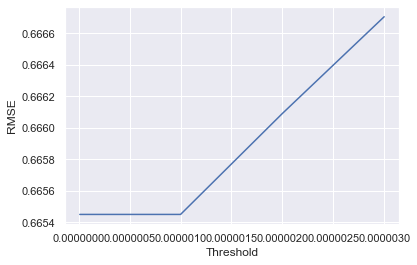

In [117]:
#Part 1 for minimum rmse with train and test data
threshold=[0.00000001,0.0000001,0.0000002,0.0000003,0.0000004,0.0000005,0.0000006,0.0000007,0.0000008,0.0000009,0.000001,0.000002,0.000003]
alpha=[0.3]
iterations=1000
mat_coef=np.zeros((1,len(x_train[0])),dtype=int)
LinearReg(x_train,x_test,y_train,y_test,alpha,iterations,mat_coef,threshold)

Iterations needed to converge:  1000
Cost at convergance:  0.2491181334088997
For threshold= 1e-08  RMSE is:  0.7058585317312523
Coeffients:             0         1         2         3         4         5         6   \
999 -0.514992  0.268894 -0.038011 -0.618831 -0.014127  0.042684  0.771181   

           7         8        9   ...        22        23        24        25  \
999 -0.019584 -0.229835 -0.02879  ... -0.094787  0.220981  0.233451  0.254821   

           26        27        28        29        30        31  
999  0.075154  0.124576  0.091984  0.148089  0.039362 -0.162119  

[1 rows x 32 columns]
Iterations needed to converge:  1000
Cost at convergance:  0.2491181334088997
For threshold= 1e-07  RMSE is:  0.7058585317312523
Coeffients:             0         1         2         3         4         5         6   \
999 -0.514992  0.268894 -0.038011 -0.618831 -0.014127  0.042684  0.771181   

           7         8        9   ...        22        23        24        25  \
999 -0.

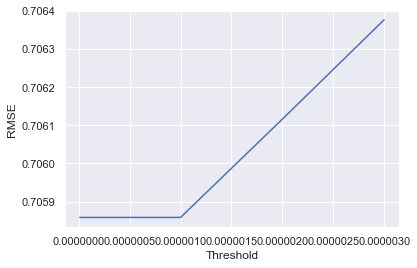

In [118]:
#training error for varying threshold values
threshold=[0.00000001,0.0000001,0.0000002,0.0000003,0.0000004,0.0000005,0.0000006,0.0000007,0.0000008,0.0000009,0.000001,0.000002,0.000003]
alpha=[0.3]
iterations=1000
mat_coef=np.zeros((1,len(x_train[0])),dtype=int)
LinearReg(x_train,x_train,y_train,y_train,alpha,iterations,mat_coef,threshold)

For iteration:  1  RMSE is:  1.269320518707953
For iteration:  2  RMSE is:  1.2164418800266275
For iteration:  3  RMSE is:  1.197268834411795
For iteration:  4  RMSE is:  1.1846666065536309
For iteration:  5  RMSE is:  1.1745653978428698
For iteration:  6  RMSE is:  1.1658033550388476
For iteration:  7  RMSE is:  1.157865511516528
For iteration:  8  RMSE is:  1.150469337646686
For iteration:  9  RMSE is:  1.143449038268206
For iteration:  10  RMSE is:  1.136704852228308
For iteration:  11  RMSE is:  1.1301756268994139
For iteration:  12  RMSE is:  1.1238230570317056
For iteration:  13  RMSE is:  1.1176224735943754
For iteration:  14  RMSE is:  1.1115574202213812
For iteration:  15  RMSE is:  1.105616441238766
For iteration:  16  RMSE is:  1.0997911689270379
For iteration:  17  RMSE is:  1.0940751781067892
For iteration:  18  RMSE is:  1.0884632960570582
For iteration:  19  RMSE is:  1.082951183744784
For iteration:  20  RMSE is:  1.077535079290288
For iteration:  21  RMSE is:  1.072211

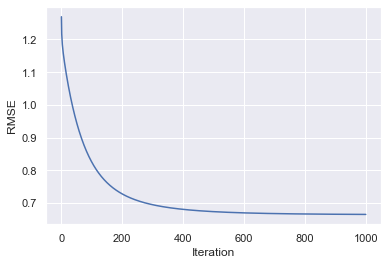

In [121]:
#RMSE as a function of number of iterations for testset
threshold=[0.000001]
alpha=[0.3]
mat_coef=np.zeros((1,len(x_train[0])),dtype=int)
iterations=1000
iters=[]
rmse=[]
cost_funcls=[linear_cost_func(x_train,y_train,mat_coef)]
gd_data=pd.DataFrame(mat_coef)
for i in range(1,iterations):
  residual=np.dot(x_train,mat_coef.T)-y_train
  derivative=np.dot(residual.T,x_train)
  mat_coef=mat_coef-derivative*alpha/len(x_train)   
  ypredict=predict(mat_coef,x_test)
  rmse+=[reg_rmse(ypredict,y_test)]
  iters+=[i]
  cost_funcls+=[linear_cost_func(x_train,y_train,mat_coef)]
  if (abs(cost_funcls[i]-cost_funcls[i-1]))<=threshold:
    break
  print("For iteration: ",i," RMSE is: ", reg_rmse(ypredict,y_test))
#print("Coeffients: ",min_cost)
plt.plot(iters,rmse)
plt.xlabel('Iteration')
plt.ylabel('RMSE')
plt.show()

For iteration:  1  RMSE is:  2.412215818047007
For iteration:  2  RMSE is:  1.3996396433326146
For iteration:  3  RMSE is:  1.1968353352538883
For iteration:  4  RMSE is:  1.155366534400196
For iteration:  5  RMSE is:  1.1403285172753301
For iteration:  6  RMSE is:  1.1308316463648544
For iteration:  7  RMSE is:  1.1232466382808837
For iteration:  8  RMSE is:  1.1166511184821988
For iteration:  9  RMSE is:  1.1106839708369796
For iteration:  10  RMSE is:  1.1051576366045521
For iteration:  11  RMSE is:  1.0999592861416598
For iteration:  12  RMSE is:  1.0950154235235907
For iteration:  13  RMSE is:  1.0902758134449368
For iteration:  14  RMSE is:  1.0857049820094187
For iteration:  15  RMSE is:  1.081277245944279
For iteration:  16  RMSE is:  1.0769736054936554
For iteration:  17  RMSE is:  1.0727797171045192
For iteration:  18  RMSE is:  1.0686845334071318
For iteration:  19  RMSE is:  1.0646793735042193
For iteration:  20  RMSE is:  1.060757278527448
For iteration:  21  RMSE is:  1.0

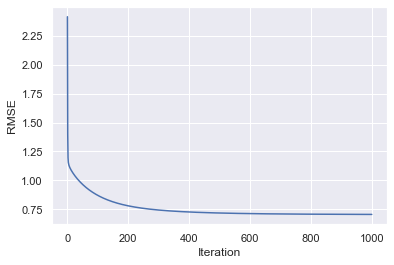

In [122]:
#RMSE as a function of number of iterations for train set
threshold=[0.000001]
alpha=[0.2]
mat_coef=np.zeros((1,len(x_train[0])),dtype=int)
iterations=1000
iters=[]
rmse=[]
cost_funcls=[linear_cost_func(x_train,y_train,mat_coef)]
gd_data=pd.DataFrame(mat_coef)
for i in range(1,iterations):
  residual=np.dot(x_train,mat_coef.T)-y_train
  derivative=np.dot(residual.T,x_train)
  mat_coef=mat_coef-derivative*alpha/len(x_train)   
  ypredict=predict(mat_coef,x_train)
  rmse+=[reg_rmse(ypredict,y_train)]
  iters+=[i]
  cost_funcls+=[linear_cost_func(x_train,y_train,mat_coef)]
  if (abs(cost_funcls[i]-cost_funcls[i-1]))<=threshold:
    break
  print("For iteration: ",i," RMSE is: ", reg_rmse(ypredict,y_train))
#print("Coeffients: ",min_cost)
plt.plot(iters,rmse)
plt.xlabel('Iteration')
plt.ylabel('RMSE')
plt.show()

### Experiment 3-Selecting 8 random features

In [123]:
iterations=1000
target=df[['Log Bike Count']].values
df_predictors=df.drop(columns=['Rented Bike Count','Log Bike Count','intercept'])
df_predictors=df_predictors.sample(axis = 1,random_state=0,n=8) 
df_predictors.insert(0,'intercept',1)
predictors=df_predictors.values
x_train, x_test, y_train, y_test = train_test_split(predictors, target, test_size = 0.2, random_state = 0)


In [124]:
#Random 8 features test rmse
threshold=[0.000001]
alpha=[0.3]
iterations=1000
mat_coef=np.zeros((1,len(x_train[0])),dtype=int)
print('For predictors: ', df_predictors.columns)
LinearReg(x_train,x_test,y_train,y_test,alpha,iterations,mat_coef,threshold)

For predictors:  Index(['intercept', 'Humidity(%)', 'Weekday_5', 'Functioning_Yes',
       'Season_Summer', 'Weekday_3', 'Weekday_1', 'Month_10', 'Season_Winter'],
      dtype='object')
Iterations needed to converge:  789
Cost at convergance:  0.37558699107119836
For threshold= [1e-06]  and learning rate:  [0.3]  RMSE is:  0.8343157564400205
Coeffients:              0        1         2         3         4         5        6  \
788  0.036853 -0.49327  0.046836  6.174635  0.502301  0.043734  0.03982   

            7         8  
788  0.287248 -1.278788  


0.8343157564400205

In [125]:
#Random 8 features train rmse
threshold=[0.000001]
alpha=[0.3]
iterations=1000
mat_coef=np.zeros((1,len(x_train[0])),dtype=int)
print('For predictors: ', df_predictors.columns)
LinearReg(x_train,x_train,y_train,y_train,alpha,iterations,mat_coef,threshold)

For predictors:  Index(['intercept', 'Humidity(%)', 'Weekday_5', 'Functioning_Yes',
       'Season_Summer', 'Weekday_3', 'Weekday_1', 'Month_10', 'Season_Winter'],
      dtype='object')
Iterations needed to converge:  789
Cost at convergance:  0.37558699107119836
For threshold= [1e-06]  and learning rate:  [0.3]  RMSE is:  0.8667029376564942
Coeffients:              0        1         2         3         4         5        6  \
788  0.036853 -0.49327  0.046836  6.174635  0.502301  0.043734  0.03982   

            7         8  
788  0.287248 -1.278788  


0.8667029376564942

### Experiment 4 Choosing 8 best features

For seed= 0
For predictors:  Index(['intercept', 'Humidity(%)', 'Weekday_5', 'Functioning_Yes',
       'Season_Summer', 'Weekday_3', 'Weekday_1', 'Month_10', 'Season_Winter'],
      dtype='object')
Iterations needed to converge:  789
Cost at convergance:  0.37558699107119836
For threshold= [1e-06]  and learning rate:  [0.3]  RMSE is:  0.8343157564400205
Coeffients:              0        1         2         3         4         5        6  \
788  0.036853 -0.49327  0.046836  6.174635  0.502301  0.043734  0.03982   

            7         8  
788  0.287248 -1.278788  
For seed= 1
For predictors:  Index(['intercept', 'Weekday_3', 'Wind speed (m/s)', 'Month_7', 'Month_11',
       'Month_10', 'Month_9', 'Month_8', 'Month_6'],
      dtype='object')
Iterations needed to converge:  194
Cost at convergance:  1.116467350150446
For threshold= [1e-06]  and learning rate:  [0.3]  RMSE is:  1.5409846998592567
Coeffients:              0         1         2         3         4       5         6  \
193 

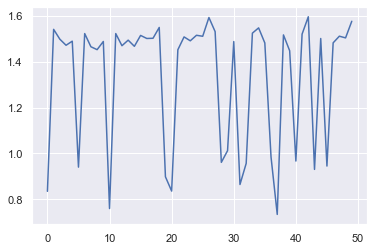

In [126]:
#Selecting best 8 features using test set
iterations=1000
mat_coef=np.zeros((1,len(x_train[0])),dtype=int)
target=df[['Log Bike Count']].values
df_predict=df.drop(columns=['Rented Bike Count','Log Bike Count','intercept'])
iters=[]
RMSE=[]
for i in range(50):
  print('For seed=', i)
  df_predictors=df_predict.sample(axis = 1,random_state=i ,n=8) 
  df_predictors.insert(0,'intercept',1)
  predictors=df_predictors.values
  x_train, x_test, y_train, y_test = train_test_split(predictors, target, test_size = 0.2, random_state = 0)
  threshold=[0.000001]
  alpha=[0.3]
  mat_coef=np.zeros((1,len(x_train[0])),dtype=int)
  iterations=1000
  print('For predictors: ', df_predictors.columns)
  m=LinearReg(x_train,x_test,y_train,y_test,alpha,iterations,mat_coef,threshold)
  iters+=[i]
  RMSE+=[m]
plt.plot(iters,RMSE)

In [127]:
RMSE.index(min(RMSE))

37

For seed= 0
For predictors:  Index(['intercept', 'Humidity(%)', 'Weekday_5', 'Functioning_Yes',
       'Season_Summer', 'Weekday_3', 'Weekday_1', 'Month_10', 'Season_Winter'],
      dtype='object')
Iterations needed to converge:  789
Cost at convergance:  0.37558699107119836
For threshold= [1e-06]  and learning rate:  [0.3]  RMSE is:  0.8667029376564942
Coeffients:              0        1         2         3         4         5        6  \
788  0.036853 -0.49327  0.046836  6.174635  0.502301  0.043734  0.03982   

            7         8  
788  0.287248 -1.278788  
For seed= 1
For predictors:  Index(['intercept', 'Weekday_3', 'Wind speed (m/s)', 'Month_7', 'Month_11',
       'Month_10', 'Month_9', 'Month_8', 'Month_6'],
      dtype='object')
Iterations needed to converge:  194
Cost at convergance:  1.116467350150446
For threshold= [1e-06]  and learning rate:  [0.3]  RMSE is:  1.494300739577175
Coeffients:              0         1         2         3         4       5         6  \
193  

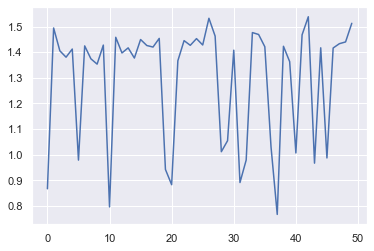

In [128]:
#Selecting best features using train set
iterations=1000
mat_coef=np.zeros((1,len(x_train[0])),dtype=int)
target=df[['Log Bike Count']].values
df_predict=df.drop(columns=['Rented Bike Count','Log Bike Count','intercept'])
iters=[]
RMSE=[]
for i in range(50):
  print('For seed=', i)
  df_predictors=df_predict.sample(axis = 1,random_state=i ,n=8) 
  df_predictors.insert(0,'intercept',1)
  predictors=df_predictors.values
  x_train, x_test, y_train, y_test = train_test_split(predictors, target, test_size = 0.2, random_state = 0)
  threshold=[0.000001]
  alpha=[0.3]
  mat_coef=np.zeros((1,len(x_train[0])),dtype=int)
  iterations=1000
  print('For predictors: ', df_predictors.columns)
  m=LinearReg(x_train,x_train,y_train,y_train,alpha,iterations,mat_coef,threshold)
  iters+=[i]
  RMSE+=[m]
plt.plot(iters,RMSE)

In [129]:
RMSE.index(min(RMSE))

37

In [130]:
iterations=1000
target=df[['Log Bike Count']].values
df_predict=df.drop(columns=['Rented Bike Count','Log Bike Count','intercept'])
ls= ['Season_Spring', 'Rainfall(mm)', 'Hour','Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Weekday_5','Humidity(%)', 'Functioning_Yes']
df_predictors=df_predict[ls]
df_predictors.insert(0,'intercept',1)
predictors=df_predictors.values
x_train, x_test, y_train, y_test = train_test_split(predictors, target, test_size = 0.2, random_state = 0)
threshold=[0.000001]
alpha=[0.3]
mat_coef=np.zeros((1,len(x_train[0])),dtype=int)
print('For predictors: ', df_predictors.columns)
LinearReg(x_train,x_test,y_train,y_test,alpha,iterations,mat_coef,threshold)

For predictors:  Index(['intercept', 'Season_Spring', 'Rainfall(mm)', 'Hour',
       'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Weekday_5',
       'Humidity(%)', 'Functioning_Yes'],
      dtype='object')
Iterations needed to converge:  758
Cost at convergance:  0.2938643243244763
For threshold= [1e-06]  and learning rate:  [0.3]  RMSE is:  0.7335686780093096
Coeffients:              0         1         2         3         4         5         6  \
757 -0.051387  0.055879 -0.234263  0.263443  0.776406 -0.023679  0.018237   

            7         8  
757 -0.622905  6.095955  


0.7335686780093096

### Logistic Regression

In [135]:
iterations=1000
mean = df['Rented Bike Count'].mean()
df.loc[df['Rented Bike Count'] <= mean, 'target'] = 0
df.loc[df['Rented Bike Count'] > mean, 'target'] = 1
target=df[['target']].values
df_predictors=df.drop(columns=['Rented Bike Count','Log Bike Count','target'],axis=1).values
x_train, x_test, y_train, y_test = train_test_split(df_predictors, target, test_size = 0.2, random_state = 0)
mat_coef=np.zeros((1,len(x_train[0])),dtype=int)


In [136]:
def sigmoid(x,mat_coef):
  y_hat=np.dot(x,mat_coef.T)
  z=1/(1+np.exp(-y_hat))
  return z

In [137]:
#define cost function
def logit_cost_func(x,actualval,mat_coef):
  term1=np.sum(np.dot(actualval.T,np.log(sigmoid(x,mat_coef))))
  term2=np.sum(np.dot((1-actualval).T,np.log(1-sigmoid(x,mat_coef))))
  cost_func=-(term1+term2)/len(x)
  return cost_func

In [138]:
#define gradient decent considering fixed iterations
def logit_gdesc(x,actualval,mat_coef,alpha,iterations,threshold):
  cost_funcls=[logit_cost_func(x,actualval,mat_coef)]
  gd_df=pd.DataFrame(mat_coef)
  for i in range(1,iterations):
    residual=sigmoid(x,mat_coef)-actualval
    der=np.dot(residual.T,x)
    mat_coef=mat_coef-der*alpha/len(x)   
    gd_df=gd_df.append(pd.DataFrame(mat_coef),ignore_index=True)
    cost_funcls+=[logit_cost_func(x,actualval,mat_coef)]
    if (abs(cost_funcls[i]-cost_funcls[i-1]))<=threshold:
      break
  gd_df['cost']=cost_funcls
  print("Iterations needed to converge: ", i+1)
  min_cost_coef=gd_df[gd_df.cost==min(gd_df.cost)]
  print('Cost at convergance: ', cost_funcls[i])
  min_cost_coef=min_cost_coef.drop(columns='cost')
  return min_cost_coef

In [139]:
def log_predict(coef_ls,x_mat):
  pred=x_mat.dot(coef_ls.T)
  target= np.where(pred >= 0.5 , 1, 0)
  return target

In [140]:
def accuracy(ypredict,ytest):
  df = pd.DataFrame({'actual': ytest.flatten(), 'predicted': ypredict.flatten()})
  correct_pred= df.loc[df['actual'] == df['predicted']]
  acu=len(correct_pred)/len(ytest)   
  return acu

In [141]:
def LogisticReg(x_train,x_test,y_train,y_test,alpha,iterations,mat_coef,threshold):
  if len(alpha)>1:
    coef_ls=[0]*len(alpha)
    ypredict=[0]*len(alpha)
    accu=[0]*len(alpha)
    for i, a in enumerate(alpha, start=0):
      coef_ls[i]=logit_gdesc(x_train,y_train,mat_coef,a,iterations,threshold)
      ypredict[i]=log_predict(coef_ls[i],x_test)
      accu[i]=accuracy(ypredict[i],y_test)
      print("For learning rate=", a, " Accuracy is: ", accu[i])
      print("Coeffients: ",coef_ls[i])
    plt.plot(alpha,accu)
    plt.xlabel('Learning Rate')
    plt.ylabel('Accuracy')
    plt.show()
  elif len(threshold)>1:
    coef_ls=[0]*len(threshold)
    ypredict=[0]*len(threshold)
    accu=[0]*len(threshold)
    for i, t in enumerate(threshold, start=0):
      coef_ls[i]=logit_gdesc(x_train,y_train,mat_coef,alpha,iterations,t)
      ypredict[i]=log_predict(coef_ls[i],x_test)
      accu[i]=accuracy(ypredict[i],y_test)
      print("For threshold=", t, " Accuracy is: ", accu[i])
      print("Coeffients: ",coef_ls[i])
    plt.plot(threshold,accu)
    plt.xlabel('Threshold')
    plt.ylabel('Accuracy')
    plt.show()
  else:
    coef_ls=[0]
    ypredict=[0]
    accu=[0]
    for i in range(1):
      coef_ls[i]=logit_gdesc(x_train,y_train,mat_coef,alpha,iterations,threshold)
      ypredict[i]=log_predict(coef_ls[i],x_test)
      accu[i]=accuracy(ypredict[i],y_test)
      print("For threshold=", threshold," and learning rate: ",alpha, " Accuracy is: ", accu[i])
      print("Coeffients: ",coef_ls[i])
    return accu[i]

### Experiment 1-varying alpha

Iterations needed to converge:  1000
Cost at convergance:  0.3449049562508319
For learning rate= 0.1  Accuracy is:  0.8547356188262638
Coeffients:             0         1         2         3         4        5         6   \
999 -0.765797  0.854525  0.979273 -0.662943 -0.067441  0.06422  0.541771   

           7         8         9   ...        22        23        24  \
999  0.268053 -0.904805 -0.281169  ... -0.149822  0.587229  0.647433   

           25       26        27        28        29        30        31  
999 -0.416646 -0.20971 -0.059896 -0.054057  0.115071 -0.070599 -0.509146  

[1 rows x 32 columns]
Iterations needed to converge:  1000
Cost at convergance:  0.33036992773847834
For learning rate= 0.2  Accuracy is:  0.8663567693201627
Coeffients:             0         1         2         3         4         5         6   \
999 -1.297642  0.897724  1.029397 -0.667225 -0.040969  0.069833  0.525005   

           7         8         9   ...        22        23        24  \
999  

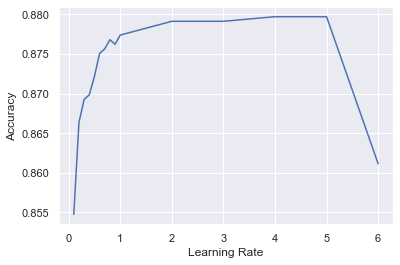

In [143]:
#experimenting on test set
threshold=[0.000001]
alpha=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6]
LogisticReg(x_train,x_test,y_train,y_test,alpha,iterations,mat_coef,threshold)

Iterations needed to converge:  1000
Cost at convergance:  0.3449049562508319
For learning rate= 0.1  Accuracy is:  0.8548176137189362
Coeffients:             0         1         2         3         4        5         6   \
999 -0.765797  0.854525  0.979273 -0.662943 -0.067441  0.06422  0.541771   

           7         8         9   ...        22        23        24  \
999  0.268053 -0.904805 -0.281169  ... -0.149822  0.587229  0.647433   

           25       26        27        28        29        30        31  
999 -0.416646 -0.20971 -0.059896 -0.054057  0.115071 -0.070599 -0.509146  

[1 rows x 32 columns]
Iterations needed to converge:  1000
Cost at convergance:  0.33036992773847834
For learning rate= 0.2  Accuracy is:  0.8612120331347188
Coeffients:             0         1         2         3         4         5         6   \
999 -1.297642  0.897724  1.029397 -0.667225 -0.040969  0.069833  0.525005   

           7         8         9   ...        22        23        24  \
999  

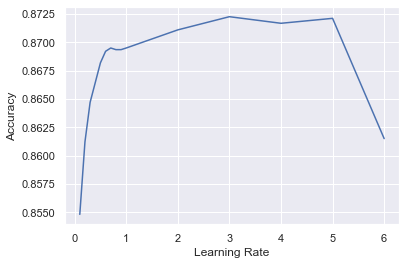

In [144]:
#Experimenting on train set
threshold=[0.000001]
alpha=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6]
mat_coef=np.zeros((1,len(x_train[0])),dtype=int)
LogisticReg(x_train,x_train,y_train,y_train,alpha,iterations,mat_coef,threshold)

### Experiment 2 -varying threshold

Iterations needed to converge:  1000
Cost at convergance:  0.30346984263002613
For threshold= 1e-07  Accuracy is:  0.8797210923881464
Coeffients:             0         1         2         3         4         5         6   \
999 -6.340222  1.061254  1.640008 -0.479299 -0.016308  0.006464 -0.193923   

           7        8         9   ...        22        23        24        25  \
999  0.252635 -2.47807 -0.691969  ... -0.589799  0.351974  0.010806  0.374582   

           26        27        28        29        30        31  
999  0.133333  0.022533  0.068734  0.285264 -0.108604 -0.705212  

[1 rows x 32 columns]
Iterations needed to converge:  1000
Cost at convergance:  0.30346984263002613
For threshold= 5e-07  Accuracy is:  0.8797210923881464
Coeffients:             0         1         2         3         4         5         6   \
999 -6.340222  1.061254  1.640008 -0.479299 -0.016308  0.006464 -0.193923   

           7        8         9   ...        22        23        24        25 

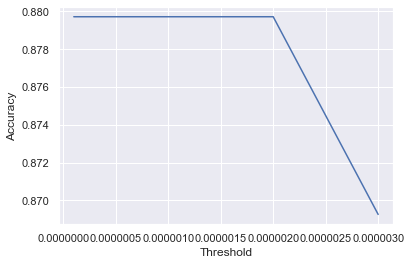

In [145]:
#Experimenting with test set
threshold=[0.0000001,0.0000005,0.000001,0.000002,0.000003]
alpha=[5]
iterations=1000
mat_coef=np.zeros((1,len(x_train[0])),dtype=int)
LogisticReg(x_train,x_test,y_train,y_test,alpha,iterations,mat_coef,threshold)

Iterations needed to converge:  747
Cost at convergance:  0.303824604655505
For threshold= 2e-06  Accuracy is:  0.8797210923881464
Coeffients:             0         1         2         3         4         5         6   \
746 -5.934947  1.057266  1.583602 -0.496699 -0.015293  0.008958 -0.133533   

           7         8         9   ...        22        23       24        25  \
746  0.254886 -2.452237 -0.696191  ... -0.551861  0.388397  0.06425  0.186269   

           26        27        28        29       30        31  
746  0.107717  0.004429  0.050853  0.270064 -0.12059 -0.717087  

[1 rows x 32 columns]
Iterations needed to converge:  732
Cost at convergance:  0.303855249716798
For threshold= 2.1e-06  Accuracy is:  0.8797210923881464
Coeffients:             0         1         2         3         4         5         6   \
731 -5.905441  1.056934  1.578926 -0.498155 -0.015211  0.009161 -0.128535   

           7         8         9   ...        22        23      24        25  \
731 

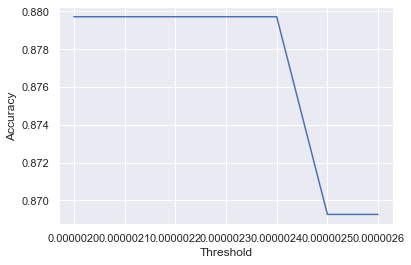

In [146]:
threshold=[0.000002,0.0000021,0.0000022,0.0000023,0.0000024,0.0000025,0.0000026]
alpha=[5]
iterations=1000
mat_coef=np.zeros((1,len(x_train[0])),dtype=int)
LogisticReg(x_train,x_test,y_train,y_test,alpha,iterations,mat_coef,threshold)

Iterations needed to converge:  747
Cost at convergance:  0.303824604655505
For threshold= 2e-06  Accuracy is:  0.8719662839703531
Coeffients:             0         1         2         3         4         5         6   \
746 -5.934947  1.057266  1.583602 -0.496699 -0.015293  0.008958 -0.133533   

           7         8         9   ...        22        23       24        25  \
746  0.254886 -2.452237 -0.696191  ... -0.551861  0.388397  0.06425  0.186269   

           26        27        28        29       30        31  
746  0.107717  0.004429  0.050853  0.270064 -0.12059 -0.717087  

[1 rows x 32 columns]
Iterations needed to converge:  732
Cost at convergance:  0.303855249716798
For threshold= 2.1e-06  Accuracy is:  0.8719662839703531
Coeffients:             0         1         2         3         4         5         6   \
731 -5.905441  1.056934  1.578926 -0.498155 -0.015211  0.009161 -0.128535   

           7         8         9   ...        22        23      24        25  \
731 

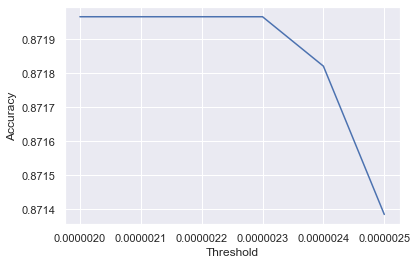

In [147]:
threshold=[0.000002,0.0000021,0.0000022,0.0000023,0.0000024,0.0000025]
alpha=[5]
iterations=1000
mat_coef=np.zeros((1,len(x_train[0])),dtype=int)
LogisticReg(x_train,x_train,y_train,y_train,alpha,iterations,mat_coef,threshold)

For iteration:  1  accuracy is:  0.7908192911098199
For iteration:  2  accuracy is:  0.8303312027890761
For iteration:  3  accuracy is:  0.8187100522951772
For iteration:  4  accuracy is:  0.832074375363161
For iteration:  5  accuracy is:  0.8070889018012783
For iteration:  6  accuracy is:  0.8361417780360255
For iteration:  7  accuracy is:  0.7908192911098199
For iteration:  8  accuracy is:  0.8309122603137711
For iteration:  9  accuracy is:  0.779198140615921
For iteration:  10  accuracy is:  0.8291690877396862
For iteration:  11  accuracy is:  0.7780360255665311
For iteration:  12  accuracy is:  0.831493317838466
For iteration:  13  accuracy is:  0.789076118535735
For iteration:  14  accuracy is:  0.8303312027890761
For iteration:  15  accuracy is:  0.799535153980244
For iteration:  16  accuracy is:  0.8338175479372458
For iteration:  17  accuracy is:  0.8082510168506682
For iteration:  18  accuracy is:  0.8355607205113306
For iteration:  19  accuracy is:  0.8152237071470075
For ite

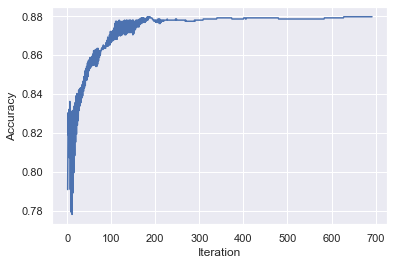

In [148]:
#Accuracy as a function of number of iterations for test set
threshold=[0.0000024]
alpha=[5]
mat_coef=np.zeros((1,len(x_train[0])),dtype=int)
iterations=1000
iters=[]
accu=[]
cost_funcls=[logit_cost_func(x_train,y_train,mat_coef)]
gd_df=pd.DataFrame(mat_coef)
for i in range(1,iterations):
  residual=sigmoid(x_train,mat_coef)-y_train
  der=np.dot(residual.T,x_train)
  mat_coef=mat_coef-der*alpha/len(x_train)   
  ypredict=log_predict(mat_coef,x_test)
  accu+=[accuracy(ypredict,y_test)]
  iters+=[i]
  cost_funcls+=[logit_cost_func(x_train,y_train,mat_coef)]
  if (abs(cost_funcls[i]-cost_funcls[i-1]))<=threshold:
    break
  print("For iteration: ",i," accuracy is: ", accuracy(ypredict,y_test))
plt.plot(iters,accu)
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.show()

For iteration:  1  accuracy is:  0.787676209853219
For iteration:  2  accuracy is:  0.8304025577677663
For iteration:  3  accuracy is:  0.8149978200842901
For iteration:  4  accuracy is:  0.8404301700334253
For iteration:  5  accuracy is:  0.8104926609504433
For iteration:  6  accuracy is:  0.8465339340212178
For iteration:  7  accuracy is:  0.7969771835489028
For iteration:  8  accuracy is:  0.8411568086034007
For iteration:  9  accuracy is:  0.7785205638715303
For iteration:  10  accuracy is:  0.8318558349077169
For iteration:  11  accuracy is:  0.7791018747275106
For iteration:  12  accuracy is:  0.8317105071937219
For iteration:  13  accuracy is:  0.7921813689870658
For iteration:  14  accuracy is:  0.8372329603255341
For iteration:  15  accuracy is:  0.8033716029646853
For iteration:  16  accuracy is:  0.842028774887371
For iteration:  17  accuracy is:  0.8102020055224531
For iteration:  18  accuracy is:  0.8442086905972969
For iteration:  19  accuracy is:  0.8123819212323791
For 

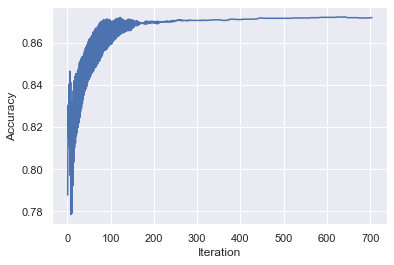

In [149]:
#Accuracy as a function of number of iterations for train set
threshold=[0.0000023]
alpha=[5]
mat_coef=np.zeros((1,len(x_train[0])),dtype=int)
iterations=1000
iters=[]
accu=[]
cost_funcls=[logit_cost_func(x_train,y_train,mat_coef)]
gd_df=pd.DataFrame(mat_coef)
for i in range(1,iterations):
  residual=sigmoid(x_train,mat_coef)-y_train
  der=np.dot(residual.T,x_train)
  mat_coef=mat_coef-der*alpha/len(x_train)   
  ypredict=log_predict(mat_coef,x_train)
  accu+=[accuracy(ypredict,y_train)]
  iters+=[i]
  cost_funcls+=[logit_cost_func(x_train,y_train,mat_coef)]
  if (abs(cost_funcls[i]-cost_funcls[i-1]))<=threshold:
    break
  print("For iteration: ",i," accuracy is: ", accuracy(ypredict,y_train))
plt.plot(iters,accu)
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.show()

### Experiment 3-Choosing 8 random features

In [150]:
iterations=1000
mat_coef=np.zeros((1,len(x_train[0])),dtype=int)
mean = df['Rented Bike Count'].mean()
df.loc[df['Rented Bike Count'] <= mean, 'target'] = 0
df.loc[df['Rented Bike Count'] > mean, 'target'] = 1
target=df[['target']].values
df_predictors=df.drop(columns=['Rented Bike Count','Log Bike Count','target','intercept'],axis=1)
predictors=df_predictors.sample(axis = 1,random_state=0,n=8) 
predictors.insert(0,'intercept',1)
preds=predictors.values
x_train, x_test, y_train, y_test = train_test_split(preds, target, test_size = 0.2, random_state = 0)


In [151]:
#Random 8 features within test
threshold=[0.0000024]
alpha=[5]
mat_coef=np.zeros((1,len(x_train[0])),dtype=int)
iterations=1000
print('For predictors: ', predictors.columns)
LogisticReg(x_train,x_test,y_train,y_test,alpha,iterations,mat_coef,threshold)

For predictors:  Index(['intercept', 'Humidity(%)', 'Weekday_5', 'Functioning_Yes',
       'Season_Summer', 'Weekday_3', 'Weekday_1', 'Month_10', 'Season_Winter'],
      dtype='object')
Iterations needed to converge:  483
Cost at convergance:  0.42607519686462686
For threshold= [2.4e-06]  and learning rate:  [5]  Accuracy is:  0.7693201626961069
Coeffients:              0         1         2         3        4         5         6  \
482 -4.039979 -1.096845 -0.016583  4.068201  0.98701  0.123073  0.120307   

           7         8  
482  0.75944 -5.136105  


0.7693201626961069

In [152]:
#Random 8 features within train
threshold=[0.0000023]
alpha=[5]
mat_coef=np.zeros((1,len(x_train[0])),dtype=int)
iterations=1000
print('For predictors: ', predictors.columns)
LogisticReg(x_train,x_train,y_train,y_train,alpha,iterations,mat_coef,threshold)

For predictors:  Index(['intercept', 'Humidity(%)', 'Weekday_5', 'Functioning_Yes',
       'Season_Summer', 'Weekday_3', 'Weekday_1', 'Month_10', 'Season_Winter'],
      dtype='object')
Iterations needed to converge:  492
Cost at convergance:  0.4260541367526076
For threshold= [2.3e-06]  and learning rate:  [5]  Accuracy is:  0.7671850021799157
Coeffients:             0         1         2         3         4         5         6  \
491 -4.06181 -1.096973 -0.016439  4.089908  0.987073  0.123363  0.120796   

            7         8  
491  0.760145 -5.136366  


0.7671850021799157

### Experiment 4-choosing 8 best features

For seed= 0
For predictors:  Index(['intercept', 'Humidity(%)', 'Weekday_5', 'Functioning_Yes',
       'Season_Summer', 'Weekday_3', 'Weekday_1', 'Month_10', 'Season_Winter'],
      dtype='object')
Iterations needed to converge:  483
Cost at convergance:  0.42607519686462686
For threshold= [2.4e-06]  and learning rate:  [5]  Accuracy is:  0.7693201626961069
Coeffients:              0         1         2         3        4         5         6  \
482 -4.039979 -1.096845 -0.016583  4.068201  0.98701  0.123073  0.120307   

           7         8  
482  0.75944 -5.136105  
For seed= 1
For predictors:  Index(['intercept', 'Weekday_3', 'Wind speed (m/s)', 'Month_7', 'Month_11',
       'Month_10', 'Month_9', 'Month_8', 'Month_6'],
      dtype='object')
Iterations needed to converge:  104
Cost at convergance:  0.5876785128045743
For threshold= [2.4e-06]  and learning rate:  [5]  Accuracy is:  0.6879721092388147
Coeffients:              0         1         2         3         4         5       

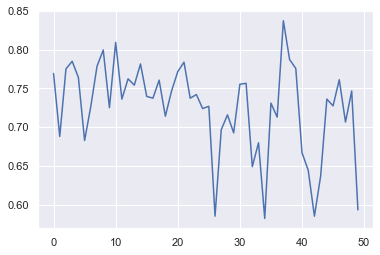

In [153]:
#Selecting best features with test set
iterations=1000
mat_coef=np.zeros((1,len(x_train[0])),dtype=int)
iters=[]
accu_ls=[]
for i in range(50):
  print('For seed=', i)
  predictors=df_predictors.sample(axis = 1,random_state=i,n=8) 
  predictors.insert(0,'intercept',1)
  preds=predictors.values
  x_train, x_test, y_train, y_test = train_test_split(preds, target, test_size = 0.2, random_state = 0)
  threshold=[0.0000024]
  alpha=[5]
  mat_coef=np.zeros((1,len(x_train[0])),dtype=int)
  iterations=1000
  print('For predictors: ', predictors.columns)
  acu=LogisticReg(x_train,x_test,y_train,y_test,alpha,iterations,mat_coef,threshold)
  iters+=[i]
  accu_ls+=[acu]
plt.plot(iters,accu_ls)

In [154]:
max(accu_ls)

0.8373038930854154

In [155]:
accu_ls.index(max(accu_ls))

37

For seed= 0
For predictors:  Index(['intercept', 'Humidity(%)', 'Weekday_5', 'Functioning_Yes',
       'Season_Summer', 'Weekday_3', 'Weekday_1', 'Month_10', 'Season_Winter'],
      dtype='object')
Iterations needed to converge:  492
Cost at convergance:  0.4260541367526076
For threshold= [2.3e-06]  and learning rate:  [5]  Accuracy is:  0.7671850021799157
Coeffients:             0         1         2         3         4         5         6  \
491 -4.06181 -1.096973 -0.016439  4.089908  0.987073  0.123363  0.120796   

            7         8  
491  0.760145 -5.136366  
For seed= 1
For predictors:  Index(['intercept', 'Weekday_3', 'Wind speed (m/s)', 'Month_7', 'Month_11',
       'Month_10', 'Month_9', 'Month_8', 'Month_6'],
      dtype='object')
Iterations needed to converge:  105
Cost at convergance:  0.5876762888782112
For threshold= [2.3e-06]  and learning rate:  [5]  Accuracy is:  0.6738846097950879
Coeffients:              0        1         2         3         4         5       

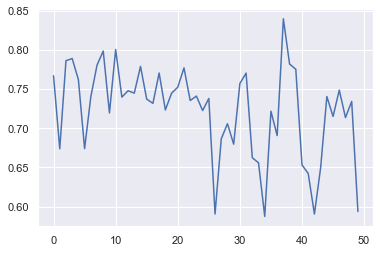

In [156]:
#Selecting best features with train set
iterations=1000
mat_coef=np.zeros((1,len(x_train[0])),dtype=int)
iters=[]
accu_ls=[]
for i in range(50):
  print('For seed=', i)
  predictors=df_predictors.sample(axis = 1,random_state=i,n=8) 
  predictors.insert(0,'intercept',1)
  preds=predictors.values
  x_train, x_test, y_train, y_test = train_test_split(preds, target, test_size = 0.2, random_state = 0)
  threshold=[0.0000023]
  alpha=[5]
  mat_coef=np.zeros((1,len(x_train[0])),dtype=int)
  iterations=1000
  print('For predictors: ', predictors.columns)
  acu=LogisticReg(x_train,x_train,y_train,y_train,alpha,iterations,mat_coef,threshold)
  iters+=[i]
  accu_ls+=[acu]
plt.plot(iters,accu_ls)

In [157]:
max(accu_ls)

0.8399941868914402

In [158]:
accu_ls.index(max(accu_ls))

37

In [159]:
mat_coef=np.zeros((1,len(x_train[0])),dtype=int)
ls=['Season_Spring', 'Rainfall(mm)', 'Hour','Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Weekday_5','Humidity(%)', 'Functioning_Yes']
predictors=df_predictors[ls]
predictors.insert(0,'intercept',1)
preds=predictors.values
x_train, x_test, y_train, y_test = train_test_split(preds, target, test_size = 0.2, random_state = 0)
threshold=[0.0000024]
alpha=[5]
print('For predictors: ', predictors.columns)
LogisticReg(x_train,x_test,y_train,y_test,alpha,iterations,mat_coef,threshold)

For predictors:  Index(['intercept', 'Season_Spring', 'Rainfall(mm)', 'Hour',
       'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Weekday_5',
       'Humidity(%)', 'Functioning_Yes'],
      dtype='object')
Iterations needed to converge:  518
Cost at convergance:  0.3801877970115383
For threshold= [2.4e-06]  and learning rate:  [5]  Accuracy is:  0.8373038930854154
Coeffients:             0         1         2         3         4         5         6  \
517 -5.19766  0.245517 -2.287541  0.891857  2.020511  0.337644 -0.062509   

           7         8  
517 -1.17881  4.427451  


0.8373038930854154